# Pulmonary Fibrosis Progression
    
# 1. Introduction 🃏
    
1.1 What is Pulmonary fibrosis?
* [Pulmonary fibrosis is a lung disease that occurs when lung tissue becomes damaged and scarred.](https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/symptoms-causes/syc-20353690)  This thickened, stiff tissue makes it more difficult for your lungs to work properly. If you want to know further about this type lung disease, I have linked below an informative video.

In [1]:
from IPython.display import HTML
HTML('<center><iframe width="560" height="315" src="https://www.youtube.com/embed/AfK9LPNj-Zo" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>')

# 2. Importing the necessary libraries📗

In [2]:
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

#plotly
#!pip install chart_studio
import plotly.express as px
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()

#color
from colorama import Fore, Style

import seaborn as sns

# Settings for pretty nice plots
plt.style.use('fivethirtyeight')
plt.show()

# 3. Reading the train.csv 📚

In [3]:
train_df = pd.read_csv('trainOSIC.csv')

print(Fore.YELLOW + 'Training data shape: ',Style.RESET_ALL,train_df.shape)
train_df.head(5)

Training data shape:   (1549, 7)


,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [4]:
train_df.groupby(['SmokingStatus']).count()['Patient'].to_frame()

,Patient
SmokingStatus,
Currently smokes,82
Ex-smoker,1038
Never smoked,429


# 4. Basic Data Exploration 🏕️

## General Info

In [5]:
print(Fore.YELLOW + 'Train Set !!',Style.RESET_ALL)
print(train_df.info())

Train Set !! 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB
None


The type of Percent column is float64.

### Missing values

In [6]:
train_df.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

There is no missing values in train_df.

In [7]:
print(Fore.YELLOW + "The total patient ids are",Style.RESET_ALL, train_df['Patient'].count() )

The total patient ids are  1549


## Task 1

**1.1 How many unique patient ids?**

In [8]:
print(Fore.BLUE + "from those the unique ids are", Style.RESET_ALL, f"#YOUR CODE HERE")

from those the unique ids are  #YOUR CODE HERE


**1.2 Fill the gaps with code**

In [9]:
print(Fore.YELLOW + "There are",Style.RESET_ALL, "#YOUR CODE HERE", Fore.BLUE + 'unique Patient IDs',Style.RESET_ALL,'in the training set')

test_df = pd.read_csv('testOSIC.csv')

print(Fore.YELLOW + "There are", Style.RESET_ALL, "#YOUR CODE HERE", Fore.BLUE + 'unique Patient IDs',Style.RESET_ALL,'in the test set')

print(Fore.YELLOW + "There are", Style.RESET_ALL, "#YOUR CODE HERE", Fore.BLUE + 'Patient IDs',Style.RESET_ALL, 'in both the training and test sets')

print()

print(Fore.CYAN + 'These patients are in both the training and test datasets:', Style.RESET_ALL)
print("#YOUR CODE HERE")

There are  #YOUR CODE HERE unique Patient IDs  in the training set
There are  #YOUR CODE HERE unique Patient IDs  in the test set
There are  #YOUR CODE HERE Patient IDs  in both the training and test sets

These patients are in both the training and test datasets: 
#YOUR CODE HERE


In [10]:
columns = train_df.keys()
columns = list(columns)
print(columns)

['Patient', 'Weeks', 'FVC', 'Percent', 'Age', 'Sex', 'SmokingStatus']


# 5. Data Exploration in Details 🎠

In [11]:
patient_df = train_df[['Patient', 'Age', 'Sex', 'SmokingStatus']].drop_duplicates()
patient_df.head()

,Patient,Age,Sex,SmokingStatus
0,ID00007637202177411956430,79,Male,Ex-smoker
9,ID00009637202177434476278,69,Male,Ex-smoker
18,ID00010637202177584971671,60,Male,Ex-smoker
27,ID00011637202177653955184,72,Male,Ex-smoker
36,ID00012637202177665765362,65,Male,Never smoked


## Exploring the 'SmokingStatus' column

In [12]:
patient_df['SmokingStatus'].value_counts()

Ex-smoker           118
Never smoked         49
Currently smokes      9
Name: SmokingStatus, dtype: int64

In [13]:
patient_df['SmokingStatus'].value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='blue',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribution of the SmokingStatus column in the Unique Patient Set')

## Weeks distribution

In [14]:
train_df['Weeks'].value_counts().head()

8     45
12    44
18    42
10    41
6     40
Name: Weeks, dtype: int64

In [15]:
train_df['Weeks'].value_counts().iplot(kind='barh',
                                      xTitle='Counts(Weeks)', 
                                      linecolor='black', 
                                      opacity=0.7,
                                      color='#FB8072',
                                      theme='pearl',
                                      bargap=0.2,
                                      gridcolor='white',
                                      title='Distribution of the Weeks in the training set')

In [16]:
train_df['Weeks'].iplot(kind='hist',
                              xTitle='Weeks', 
                              yTitle='Counts',
                              linecolor='black', 
                              opacity=0.7,
                              color='#FB8072',
                              theme='pearl',
                              bargap=0.2,
                              gridcolor='white',
                              title='Distribution of the Weeks in the training set')

There are some negative values for Weeks. 

Because Weeks is the relative number of weeks pre/post the baseline CT.

## Distribution Age over Week

In [17]:
fig = px.scatter(train_df, x="Weeks", y="Age", color='Sex')
fig.show()

## FVC - The forced vital capacity

 The forced vital capacity (FVC), i.e. the volume of air exhaled
 - the recorded lung capacity in ml

In [18]:
train_df['FVC'].value_counts()

2095    4
2889    4
2474    4
2965    4
2694    4
       ..
3313    1
3661    1
3299    1
5895    1
4096    1
Name: FVC, Length: 1202, dtype: int64

In [19]:
train_df['FVC'].iplot(kind='hist',
                      xTitle='Lung Capacity(ml)', 
                      linecolor='black', 
                      opacity=0.8,
                      color='#FB8072',
                      bargap=0.5,
                      gridcolor='white',
                      title='Distribution of the FVC in the training set')

### FVC vs Percent

In [20]:
fig = px.scatter(train_df, x="FVC", y="Percent", color='Age')
fig.show()

FVC seems to related Percent linearly. Makes sense as both terms are proportional.

### FVC vs Age

## Task 2
**2.1 Plot a scatter graph of age and FVC for different sex**

In [21]:
#your code here

**2.2 Can we draw any conclusions from this graph?**

#your answer here

### FVC vs Weeks

**2.3 Plot a scatter graph of FVC and weeks for different smoking stats**

In [22]:
#your code here

### Pick one patient for FVC vs Weeks

In [23]:
train_df.Patient

0       ID00007637202177411956430
1       ID00007637202177411956430
2       ID00007637202177411956430
3       ID00007637202177411956430
4       ID00007637202177411956430
                  ...            
1544    ID00426637202313170790466
1545    ID00426637202313170790466
1546    ID00426637202313170790466
1547    ID00426637202313170790466
1548    ID00426637202313170790466
Name: Patient, Length: 1549, dtype: object

In [24]:
patient = train_df[train_df.Patient == 'ID00007637202177411956430']
fig = px.line(patient, x="Weeks", y="FVC", color='SmokingStatus')
fig.show()

## Task 3
**3.1 Plot one patient for Percent vs Weeks**

In [25]:
#your code here

**3.2 Plot Percent-hist**

Percent - is a computed field which approximates the patient's FVC as a percent of the typical FVC for a person of similar characteristics

In [26]:
train_df['Percent'].value_counts()

83.282505     2
86.559510     2
121.595445    2
80.474296     2
61.885639     2
             ..
82.589902     1
65.508606     1
52.391737     1
54.591498     1
52.749977     1
Name: Percent, Length: 1536, dtype: int64

In [27]:
#your code here

### Percent vs SmokingStatus In Patient Dataframe

In [28]:
fig = px.box(train_df, y='Percent', x='SmokingStatus', color='Sex', points="all",
          hover_data=train_df.columns)
fig.show()

In [29]:
df = train_df
fig = px.violin(train_df, y='Percent', x='SmokingStatus', box=True, color='Sex', points="all",
          hover_data=train_df.columns)
fig.show()

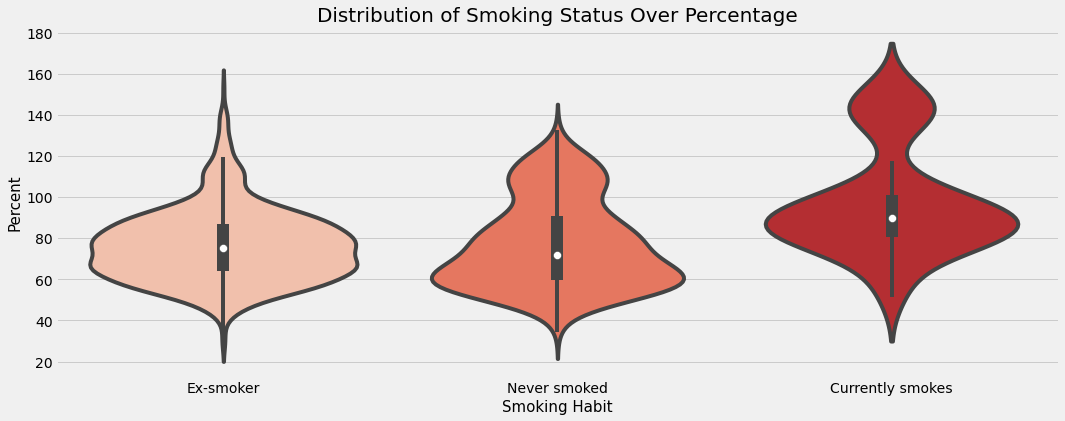

In [30]:
plt.figure(figsize=(16, 6))
sns.violinplot(x = train_df['SmokingStatus'], y = train_df['Percent'], palette = 'Reds')
plt.xlabel(xlabel = 'Smoking Habit', fontsize = 15)
plt.ylabel(ylabel = 'Percent', fontsize = 15)
plt.title(label = 'Distribution of Smoking Status Over Percentage', fontsize = 20)
plt.show()

In [31]:
fig = px.scatter(train_df, x="Age", y="Percent", color='SmokingStatus')
fig.show()

## Age Distribution of Unique Patients

In [32]:
patient_df['Age'].iplot(kind='hist',bins=30,color='red',xTitle='Ages of distribution',yTitle='Count')

### Distribution of Age vs SmokingStatus In Patient Dataframe

In [33]:
patient_df['SmokingStatus'].value_counts()

Ex-smoker           118
Never smoked         49
Currently smokes      9
Name: SmokingStatus, dtype: int64

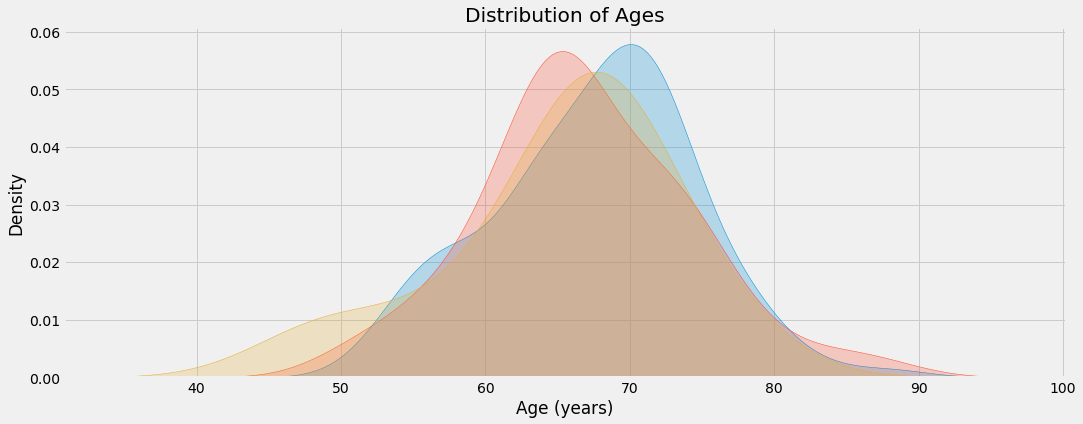

In [34]:
plt.figure(figsize=(16, 6))
sns.kdeplot(patient_df.loc[patient_df['SmokingStatus'] == 'Ex-smoker', 'Age'], label = 'Ex-smoker',shade=True)
sns.kdeplot(patient_df.loc[patient_df['SmokingStatus'] == 'Never smoked', 'Age'], label = 'Never smoked',shade=True)
sns.kdeplot(patient_df.loc[patient_df['SmokingStatus'] == 'Currently smokes', 'Age'], label = 'Currently smokes', shade=True)

# Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages');

### Distribution of Age vs Gender In Patient Dataframe

## Task 4
**4.1 Plot distribution of Age vs SmokingStatus In Patient Dataframe**

In [35]:
#your code here

**4.2 Plot violin plot distribution of Smoking Stats over Age**

In [36]:
#your code here

**4.3 Plot Gender bar-plot**

In [37]:
patient_df['Sex'].value_counts()

Male      139
Female     37
Name: Sex, dtype: int64

In [38]:
#your code here

**4.4 Make Sex-vs-Age box-plot**

In [39]:
#your code here

### Gender vs SmokingStatus In Patient Dataframe

Text(0.5, 1.0, 'Gender split by SmokingStatus')

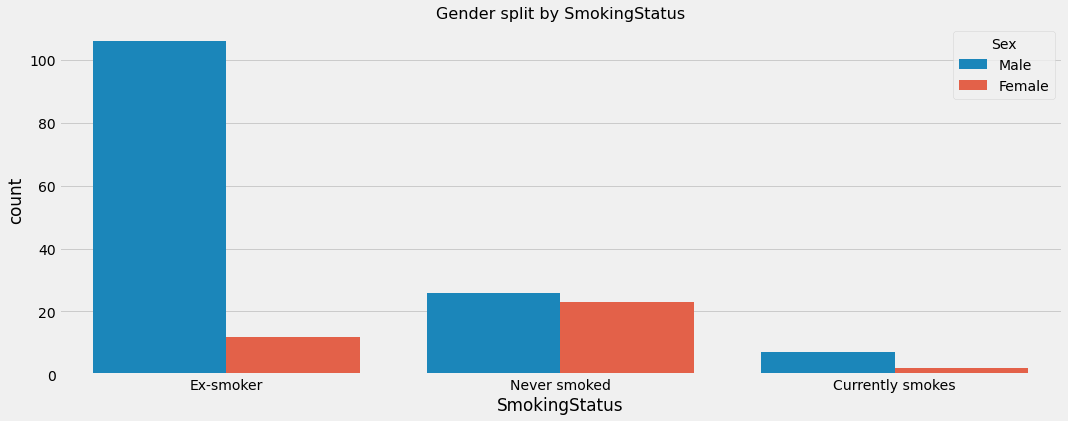

In [40]:
plt.figure(figsize=(16, 6))
sns.countplot(data=patient_df, x='SmokingStatus', hue='Sex')

plt.title('Gender split by SmokingStatus', fontsize=16)

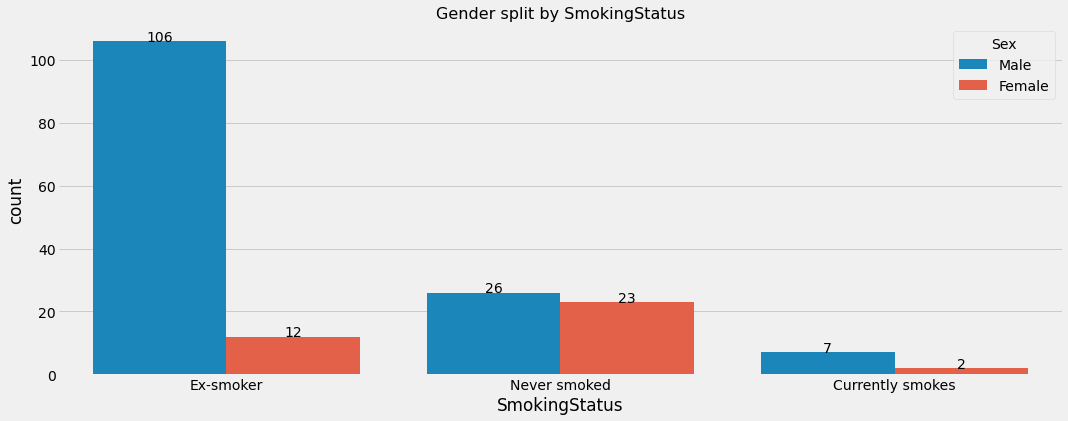

In [41]:
plt.figure(figsize=(16, 6))
a = sns.countplot(data=patient_df, x='SmokingStatus', hue='Sex')

for p in a.patches:
    a.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')

plt.title('Gender split by SmokingStatus', fontsize=16)
sns.despine(left=True, bottom=True);

## Heatmap

<AxesSubplot:>

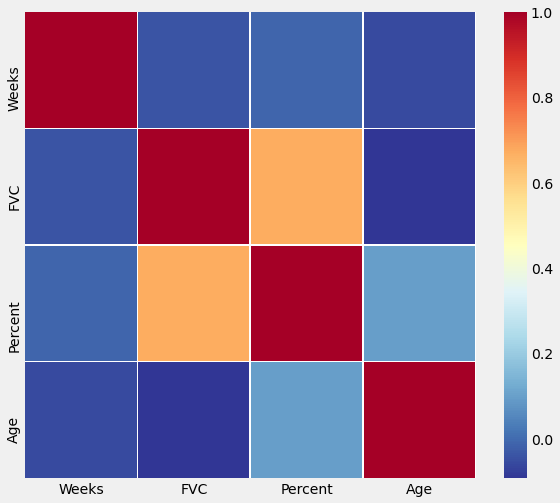

In [42]:
corrmap = train_df.corr() 
plt.figure(figsize=(9, 8))
sns.heatmap(corrmap, cmap = 'RdYlBu_r', linewidths = 0.5) 

# Pandas Profiling

In [43]:
import pandas_profiling as pdp

In [44]:
profile_train_df = pdp.ProfileReport(train_df)

In [45]:
profile_train_df